In [1]:
#predict the class of ticket of a passenger based on their age, gender, whether they survived or not, etc.
import pandas as pds
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sea

# Loading Data

In [2]:
# Load the Titanic dataset
data_ex = pds.read_csv('Titanic_Train_Dataset.csv')

# Evaluating the Data and Data Types Available

In [3]:
print(data_ex.head(15))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                

In [4]:
data_ex.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
data_ex.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Preprocessing

In [6]:
# Drop irrelevant features
data_ex = data_ex.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [15]:
# Fill missing values in 'Age' column with the median
data_ex['Age'].fillna(data_ex['Age'].median(), inplace=True)

# Differentiating the columns as per requirements.

In [8]:
# Convert 'Sex' and 'Survived' features to numerical using label encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data_ex['Sex'] = label.fit_transform(data_ex['Sex'])
data_ex['Survived'] = label.fit_transform(data_ex['Survived'])

# Create feature and target arrays
X = data_ex.drop('Pclass', axis=1)
y = data_ex['Pclass']

# Training and Testing of the Data

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

# Making the Predictions

In [16]:
# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluating and print of the metric figures of the prediction of the training and testing

In [11]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [12]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9497206703910615
Precision: 0.930662119920432
Recall: 0.9400763569966247
F1 Score: 0.934692217300913


# Box plot of the Age collumn

<AxesSubplot:xlabel='Age'>

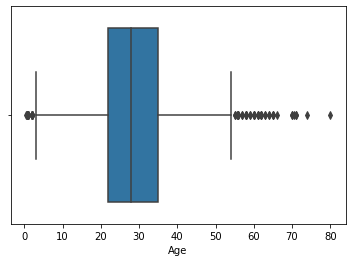

In [13]:
# Create a boxplot of the 'Age' feature
sea.boxplot(x=data_ex['Age'])

# Visualization of the prediction accuracy using the confusion matrix

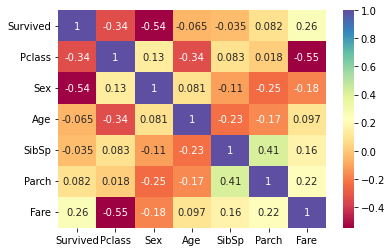

In [14]:
# Visualize the correlation between features
dataplot = sea.heatmap(data_ex.corr(), cmap="Spectral", annot=True)